In [1]:
# Tento soubor slouzi k porovnani vysledku dosazenych modelem s rucne spocitanymi vyskyty zvirat na zvolenych obrazcich. 
# Pro presnost je nutne prizpusobit hodnotu tresh, ktera udava maximalni Euklidovskou vzdalenost jednotlivych prvku tak,
# aby jeste byly prvky povazovany za soucast jednoho shluku.

In [2]:
import cv2
import numpy as np
import scipy.cluster.hierarchy as hcluster
from skimage.measure import label, regionprops
import math
import matplotlib.pyplot as plt

In [3]:
def refPoints(filepath):
    #pro nalezeni rucne oznacenych bodu
    img = cv2.imread(filepath)
    #nalezeni cervenych pixelu v BGR - cv2
    thresh = cv2.inRange(img, (0, 0, 225), (0, 0, 255))
    # vse co neni cervene bude bile
    result = img.copy()
    result = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
    result[thresh != 255] = (255,255,255)
    #jednicka znaci barvu pozadi - bila
    Labelled_Ref_Point = label(result, 1, connectivity=1)
    rprops = regionprops(Labelled_Ref_Point)
    red_bboxes = []
    for region in rprops:
        red_bboxes.append((math.ceil(region.centroid[0]), math.ceil(region.centroid[1])))
    return red_bboxes

In [4]:
def count_animals(data, thresh):
    #hierarchical clustering na urceni poctu shluku -> poctu zvirat, tresh urcuje max vzdalenost prvku
    # clustering
    clusters = hcluster.fclusterdata(data, thresh, criterion="distance")
    # plotting
    plt.scatter(*np.transpose(data), c=clusters)
    plt.axis("equal")
    title = "threshold: %f, number of clusters: %d" % (thresh, len(set(clusters)))
    plt.title(title)
    plt.show()

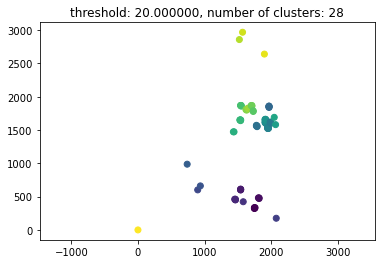

Správný počet je: 18


In [13]:
#porovnani shlukovani a realneho rucne urceneho poctu, soubory 1070, 1170, 1200
boxes = np.load("./output/data/files/boxes_1070.JPG.npy")
data = []
thresh = 20
for (x1, y1, x2, y2) in boxes:
    center = ((x1+x2)/2, (y1+y2)/2)
    data.append(center) 
count_animals(data, thresh)
hand_filepath = "./dataset/hand_count/1070_hand.PNG"
box = refPoints(hand_filepath)
print('Správný počet je:', len(box))